# 09 DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING 

#### Objective:
- This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.
- Dataset:
        - Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.

##### Tasks:
- Handle missing values as per the best practices (imputation, removal, etc.).

In [1]:
import pandas as pd #import Libraries 
import numpy as np

In [2]:
df = pd.read_csv("adult_with_headers (1).csv") #Load Dataset 
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info() #Information About Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.isnull().sum() #Check Null Values 

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

There Are No Null Values In This Dataset

#### Apply scaling techniques to numerical features:
- a.	Standard Scaling   b. Min-Max Scaling

In [5]:
num_cols = df.select_dtypes(include = 'int64').columns #Find Name Of Numarical Features 
num_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Import StandardScaler And MinMaxScaler
ss = StandardScaler() 
mms = MinMaxScaler()

In [7]:
df_ss = df.copy() #Copy Dataset For Secure Original Dataset
df_ss[num_cols] =ss.fit_transform(df_ss[num_cols]) #Apply StandarsScaler On Numarical Columns
df_ss.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K


In [8]:
df_mms = df.copy() #Copy Dataset For Secure Original Dataset
df_mms[num_cols] = mms.fit_transform(df_mms[num_cols]) #Apply MinMaxScaler On Numarical Columns
df_mms.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


#### Discuss the scenarios where each scaling technique is preferred and why.

##### Technique: Standardization 
- When to Use:
    - Data is normally distributed (bell curve).
    - Algorithms assume Gaussian distribution:
        - Logistic Regression, Linear Regression, LDA, etc.
    - When outliers are present, as it handles them better than MinMax.

- Why:
    - Standardization centers the data (mean = 0) and scales it based on standard deviation.
##### Technique: Min-Max Scaling
- When to Use:
    - When you need values between 0 and 1.
    - Algorithms based on distance:
        - KNN, SVM, Neural Networks, Gradient Descent models.

- Why:
    - MinMax Scaling preserves the relationships but compresses the range.

#### 2. Encoding Techniques:
- Apply One-Hot Encoding to categorical variables with less than 5 categories.

In [9]:
cat_cols = df.select_dtypes(include = 'object').columns #Find Categorical Column's Name
cat_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [10]:
new_cols = [col for col in cat_cols if df[col].nunique() < 5 ] #Find Names Of The Columns Who Have Less Than 5 Categories 
new_cols

['sex', 'income']

In [11]:
df.nunique() #Check Numbers Of Categories 

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

In [12]:
df2 = df.copy()
df2 = pd.get_dummies(df, columns = new_cols) #Use Get Dummies For OneHotEncoding
df2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,False,True,True,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,False,True,True,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,False,True,True,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,False,True,True,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,True,False,True,False


- Use Label Encoding for categorical variables. Data Exploration and Preprocessing:
    - Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
    - les with more than 5 categories.

In [13]:
from sklearn.preprocessing import LabelEncoder #Import LabelEncoder
le = LabelEncoder()

In [14]:
cat_cols = df2.select_dtypes(include = 'object').columns #Find Categorical Column's Name In df2
for col in cat_cols:
    if df2[col].nunique() >= 5 : #Allows Only Columnns With 5 Or More Categories 
        df2[col] = le.fit_transform(df2[col]) #Tranform Columns 
df2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,False,True,True,False
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,False,True,True,False
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,False,True,True,False
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,False,True,True,False
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,True,False,True,False


In [15]:
df2.describe() #Statistical Description Of Numerical Columns 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,1077.648844,87.303830,40.437456,36.718866
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,7385.292085,402.960219,12.347429,7.823782
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,99999.000000,4356.000000,99.000000,41.000000


In [16]:
df2.dtypes #Check DataTypes Of Each Columns

age               int64
workclass         int32
fnlwgt            int64
education         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
sex_ Female        bool
sex_ Male          bool
income_ <=50K      bool
income_ >50K       bool
dtype: object

##### Discuss the pros and cons of One-Hot Encoding and Label Encoding.


##### 1. Label Encoding

###### Pros:
- Simple and fast to apply.
- Doesn’t increase the dimensionality of the data.
- Useful when categorical variables are ordinal (i.e., order matters: low < medium < high).

###### Cons:
- Can mislead ML algorithms if categories are nominal (no order) — they may treat them as ordinal.
- Impacts models like Linear Regression or KNN, which may interpret label values as having magnitude or distance.

##### 2. One-Hot Encoding

###### Pros:
- Ideal for nominal categorical variables (no inherent order).
- Prevents the model from assuming any sort of order or priority between categories.
- Works well with algorithms like Logistic Regression, Random Forests, Neural Networks.

###### Cons:
- Increases the dimensionality of the dataset (can lead to curse of dimensionality).
- Less efficient when a variable has many categories (e.g., native-country in Adult dataset).
- Some ML models can struggle with high-dimensional sparse data.

### 3. Feature Engineering:
- Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

In [17]:
df2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,False,True,True,False
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,False,True,True,False
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,False,True,True,False
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,False,True,True,False
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,True,False,True,False


In [18]:
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [19]:
df2['net_capital'] = df2['capital_gain'] - df2['capital_loss'] #Gives a true picture of capital wealth
df2.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,net_capital
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,False,True,True,False,2174
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,False,True,True,False,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,False,True,True,False,0


In [20]:
df['marital_status'].unique() #Find all Categories In marital_status Column

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [21]:
df2['is_married'] = df2['marital_status'].apply(lambda x: 1 if x in ['Married-civ-spouse', 'Married-AF-spouse'] else 0) #Simplifies relationship into useful binary
df2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,net_capital,is_married
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,False,True,True,False,2174,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,False,True,True,False,0,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,False,True,True,False,0,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,False,True,True,False,0,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,True,False,True,False,0,0


| New Feature        | Type         | Description                        | Purpose                                    |
| ------------------ | ------------ | ---------------------------------- | ------------------------------------------ |
| `net_capital_gain` | Numeric      | `capital-gain - capital-loss`      | Gives a true picture of capital wealth     |
| `is_married`       | Binary (0/1) | Indicates if the person is married | Simplifies relationship into useful binary |

- Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [22]:
skewness = df2.skew().sort_values(ascending=False) #Find Skewness Of Each Columns
print("Skewness of numerical columns:\n",skewness)

Skewness of numerical columns:
 capital_gain      11.953848
net_capital       11.871934
capital_loss       4.594629
fnlwgt             1.446980
income_ >50K       1.212430
relationship       0.786818
sex_ Female        0.719293
age                0.558743
hours_per_week     0.227643
occupation         0.114583
is_married         0.000000
marital_status    -0.013508
education_num     -0.311676
sex_ Male         -0.719293
workclass         -0.752024
education         -0.934042
income_ <=50K     -1.212430
race              -2.435386
native_country    -3.658303
dtype: float64


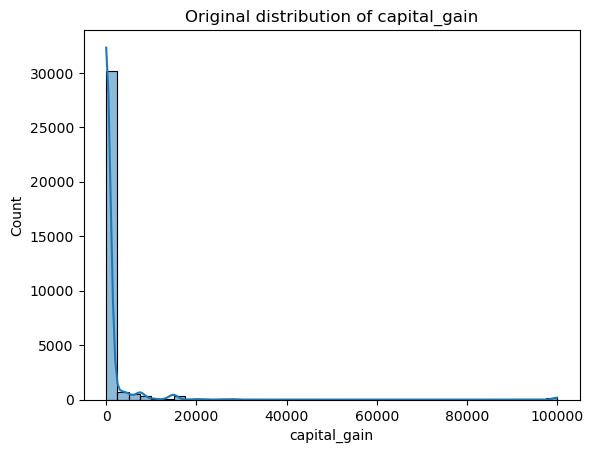

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['capital_gain'], bins=40, kde=True) #Plot Histplot of capital_gain Column
plt.title(f'Original distribution of capital_gain')
plt.show()

In [24]:
df2['capital_gain_log'] = np.log1p(df['capital_gain']) #Log Transformation Of Capital_gain Column
df2.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,net_capital,is_married,capital_gain_log
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,False,True,True,False,2174,0,7.684784
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,False,True,True,False,0,0,0.000000
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,False,True,True,False,0,0,0.000000


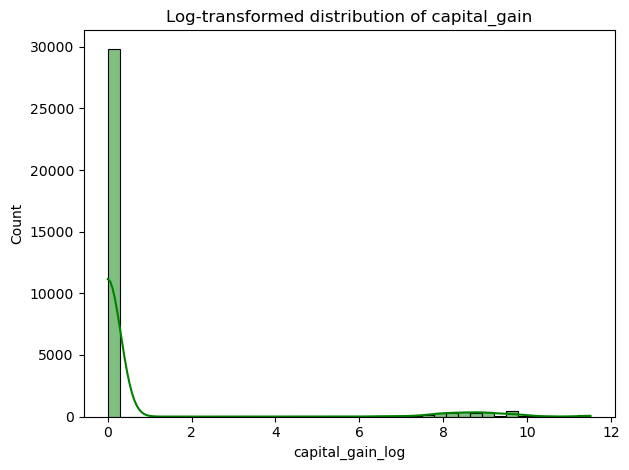

In [25]:
sns.histplot(df2['capital_gain_log'], bins=40, kde=True, color='green') #Plot Histplot Of capital_gain_log
plt.title(f'Log-transformed distribution of capital_gain')
plt.tight_layout()
plt.show()

In [26]:
df2.head() #Final Dataset Without Scaling 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,net_capital,is_married,capital_gain_log
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,False,True,True,False,2174,0,7.684784
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,False,True,True,False,0,0,0.000000
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,False,True,True,False,0,0,0.000000
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,False,True,True,False,0,0,0.000000
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,True,False,True,False,0,0,0.000000
